# CAO Points Analysis  --- COPY

<br>

In this Jupyter notebook I will include the following as per the assignment brief:

> clear and concise overview of how to load CAO points info from the CAO website into a pandas data frame - pitched at classmates 10%

> detailed comparision of cao points 2019,2020, and 2021 using the functionality in pandas 20%

> appropriate plots and other visualisations to enhance your notebook 10%


<br>

Please note that additional workings can also be found in the following weekly lecture repository [here](https://github.com/VCurry20/Jupyter-FDA2021)


The most important step to complete the entire way through this process is so check the output of the data we have against the data from the site. Sense checks should be done at each step.

*****

This file is broken into the following components:

> Imported Modules

> CAO 2021

> CAO 2020

> CAO 2019

> Plots

> References

*****


## Importing Modules

****

In [1]:
# The following are the list of modules we will use in this notebook


import requests as rq                  # used to request data from HTML site [1] 
import datetime as dt                  # used to set date and time to save file [2] 
import re                              # this is for compiliing regular expressions [3] [4]
import pandas as pd                    # used for Data Frame compilation [5]
import urllib.request as urlrq         # used for opening URLS, from which you can import data [6]
import numpy as np                     # Mathimatical Python [7]
import matplotlib.pyplot as plt        # used to plot data from COA points files [8]
import seaborn as sn                   # built on Matplotlib for additional plotting [9]


<br>

## COA 2021 

****

- This data is in HTML format
    - [Level 8](http://www2.cao.ie/points/l8.php) [1]
    - [Level 7 & 6](http://www2.cao.ie/points/l76.php) [2]
    

- In order to work with this data we will need to take a copy from HTML format

- We will save an original copy of the data

- We will then extract from this HTML page the data we require

- We will then save a copy

- From this copy we will then make a data frame using Pandas and Analyise the Data

(Note: The data format has now been changed on the CAO Site - it is now available in spreadsheet format - Excel)

***

<br>

### Getting the Data

***

### Level 8 -  2021

In [2]:
# get the CAO data from the site using the requests module

resp8 = rq.get('http://www2.cao.ie/points/l8.php')  # resp is the variable for the data from this site



# We can now review the data:

# 200 means this data has been found at this location and this data has been returned to you
# 404 would mean it is not found [1]

resp8  

<Response [200]>

****

NOTE: Encoding Errors

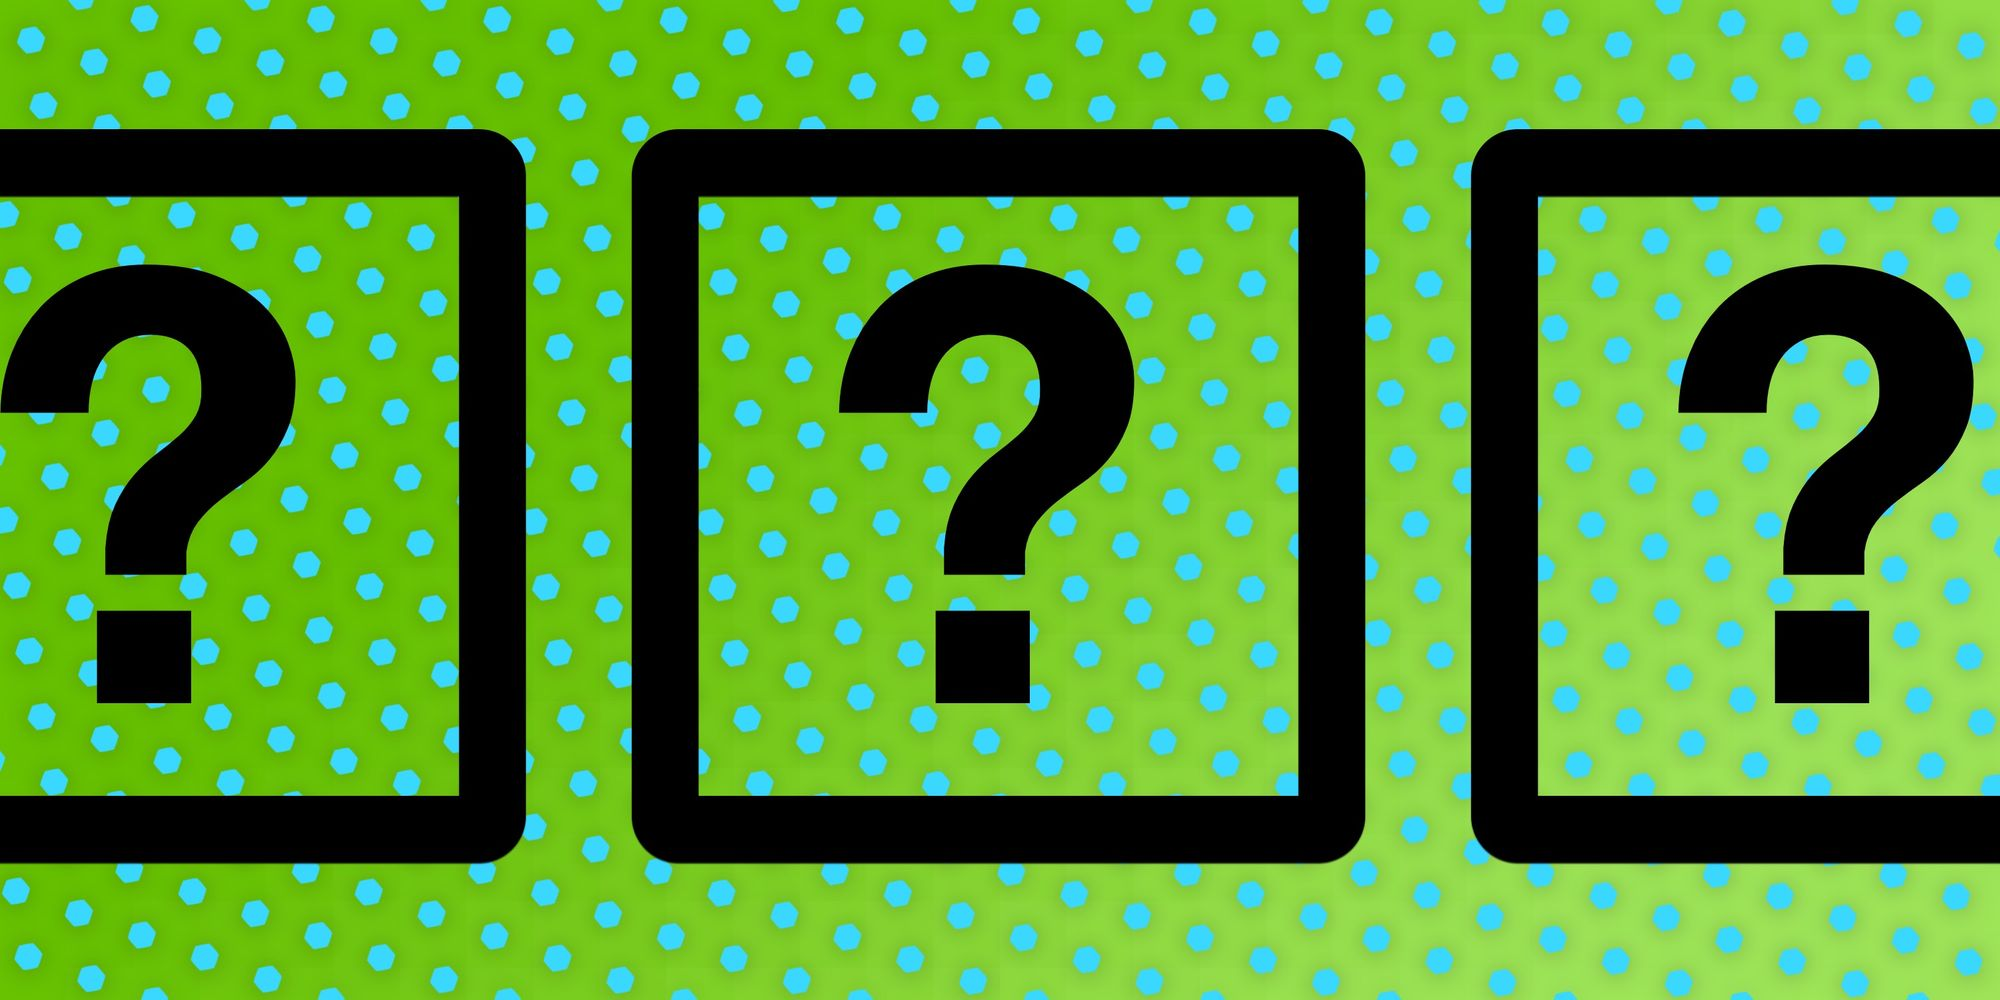

                                                                                                                    [3]

In [3]:
resp8.encoding  # this is infact incorrect

'iso-8859-1'

Even completing a manual check on the site - the character set is listed as iso-8859-1

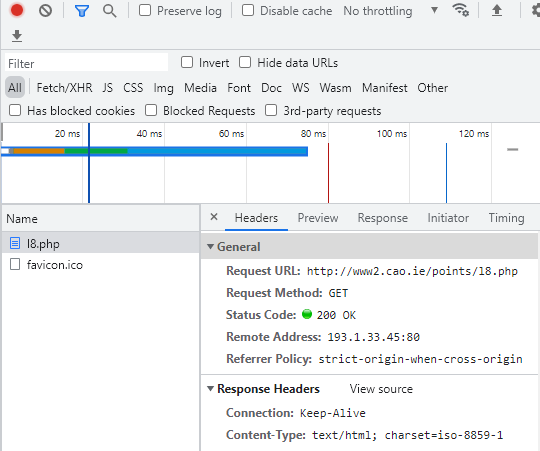

Working with data from different sites, uploaded in different ways by many different program, versions of programs and different people w sometimes need to encode the data in order for us to be able to read all the bytes we are downloading and using.

When this data was first being downloaded the above checks - both using the code and manually checking the site, lead us to believe that the coding was iso-8859-1.

However, when running through the downloaded data it became apparent that this encoding is infact incorrect - although iso-8859-1 is an example of extended Ascii, it includes the latin alphabet and letters with Fadas and other accents, it does not cover all of the text figures included in the data. [4]

There are emdashes included in the downloaded data from the CAO site and for this reason we need an encoding that includes these figures.

We need to encode to cp1252, which covers endash and emdashs. [5][6]

We found this error when printing out the data from the site, there was a box with a ? inside, this told us that the encoding could not read and output these characters. [7]

cp1252 covers the bytes that encode emdashs - the jupyter output error data give us information about the error and where this error occured in the data and also the bytes that were causing this error. Matching the error location to the downloaded data we could resolve this issue. 

In the included chart you can see in the yellow band the characters which differ from iso-8859-1

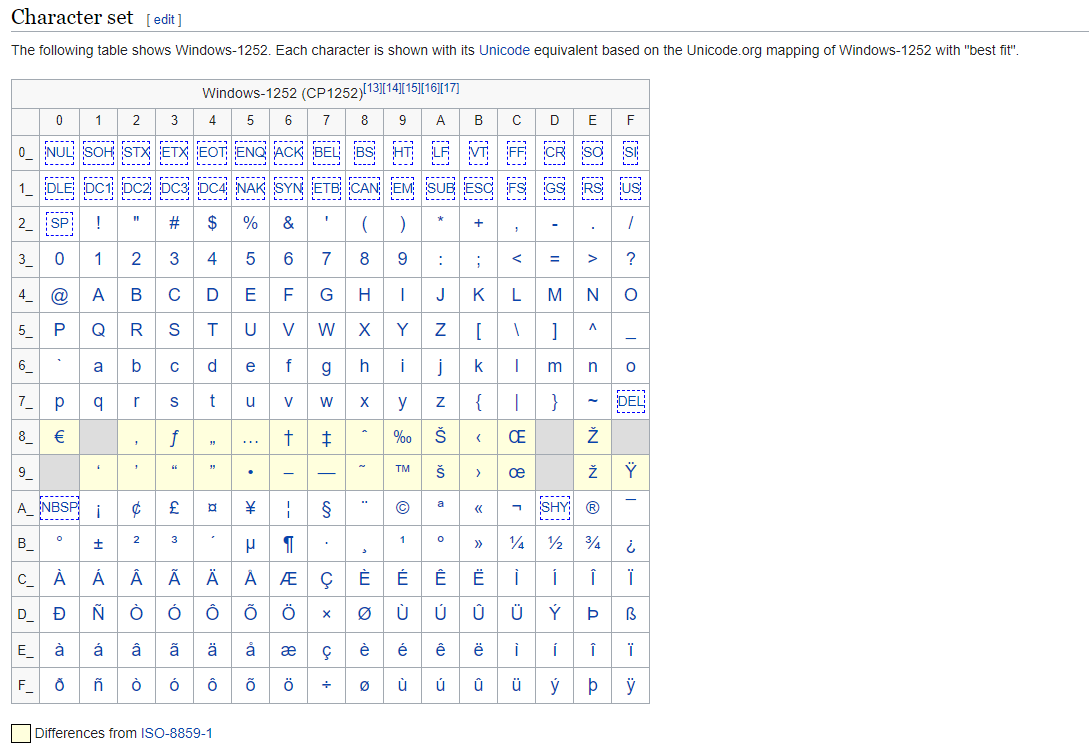

                                                                                                                      [4]

<br>

### Save Copy of Original Data

***

In this piece of code we will save the orignal page data to a file location.

In [4]:
now = dt.datetime.now()                                           # set variable now as they date and time it is now

nowstr = now.strftime('%y%m%d_%H%M%S')                            # nowstr = is a reordered version of this output

resp8.encoding = 'cp1252'                                         # encode to cp1252 not iso-8859-1

path = 'Data/cao2021_8_' + now.strftime('%y%m%d_%H%M%S') + '.html'  # save a HTML file with this name to the data file

with open (path, 'w') as f:                                       # open a "writable" version
    f.write(resp8.text)        

### Extract the Required Lines

***

In [5]:
# here we are using regular expressions to extract from the file the lines of data we need

re_course8 = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([^"])(\*?) *')  # saving the regular expression code as a variable

# regular expression breakdown as follows:
 
      # raw' [capital letters]*2[numbers]*3, wildcard1, wildcard2, wildcard3

# there are four sets of data with brackets around them.
# each wildcard is slightly different

# wildcard1 = any character any number of time
# wildcard2 = any character
# wildcad3 = zero or one of some character

# from this expression we hope to take how the lines from the page that have 
# Course Code - Course Name - Round one points - Round two points

In [6]:
def points_to_array(s):                       #
    portfolio = ''                            #
    if s[0] == '#':                           #
        portfolio = '#'                       #
    random = ''                               #
    if s[-1] == '*':                          #
        random = '*'                          #
    points = ''                               #
    for i in s:                               #
        if i.isdigit():                       #
            points = points + 1               #
    return [points, portfolio, random]        #

In [7]:
path = 'Data/cao2021_8_csv_' + nowstr + '.csv'  # saves the date to this location

# this is to a data file in this respository
# outputs will be saved each time this code is run

In [8]:
no_lines = 0                                              # no of lines - set line counter

with open(path, 'w') as f:                                # open( file - with write permissions)
    f.write(','.join(['code','title','pointsR1', 'pointsR2']) + '\n')
    
    for line in resp8.iter_lines():                       # iterate through the lines
        dline = line.decode('cp1252')                     # decode the page

        if re_course8.fullmatch(dline):                   # if a line matches the regular expression above do the following
            no_lines = no_lines + 1                       # count it - add one per line
            
            course_code = dline[:5]                       # Course Code is the first 0-4 data points
            #print(course_code)                           # print this
            course_title = dline[7:57]                    # Course title is datapoint 7-56
            #print(f"'{course_title}'")                   # print this
            
            
            course_points = re.split(' +', dline[60:])    # Course points = rest of data split with 2 spaces
            if len(course_points) !=2:
                course_points = course_points[:2]
                points_to_array("course_points")
                
                
                
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            f.write(','.join(linesplit) + '\n')  
            
   
       
        
print(f"Total number of lines is {no_lines}.")            # Print the total number of lines is - line count

Total number of lines is 949.


In [9]:
path   # print path

'Data/cao2021_8_csv_211217_211639.csv'

In [10]:
df2021_8 = pd.read_csv(path)  # set data frame 

In [11]:
df2021_8  # print dataframe

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming...,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructur...,321,NaN
4,AL810,Quantity Surveying ...,328,NaN
...,...,...,...,...
944,WD211,Creative Computing ...,270,NaN
945,WD212,Recreation and Sport Management ...,262,NaN
946,WD230,Mechanical and Manufacturing Engineering ...,230,230
947,WD231,Early Childhood Care and Education ...,266,NaN


NB: This course list number has been varified

### Level 7 & 6 -  2021

In [12]:
# get the CAO data from the site using the requests module

resp76 = rq.get('http://www2.cao.ie/points/l76.php')  # resp is the variable for the data from this site

resp76 

<Response [200]>

In [13]:
resp76.encoding

'iso-8859-1'

In [14]:
now = dt.datetime.now()                                           # set variable now as they date and time it is now

nowstr = now.strftime('%y%m%d_%H%M%S')                            # nowstr = is a reordered version of this output

resp76.encoding = 'cp1252'                                          # encode to cp1252 not iso-8859-1

path = 'Data/cao2021_76_' + now.strftime('%y%m%d_%H%M%S') + '.html'  # save a HTML file with this name to the data file

with open (path, 'w') as f:                                       # open a "writable" version
    f.write(resp76.text)        

In [15]:
re_course76 = re.compile(r'([A-Z]{2}[0-9]{3})  (.*)([^"])(\*?) *')

In [16]:
path76 = 'Data/cao2021_76_csv_' + nowstr + '.csv'  # saves the date to this location

In [17]:
no_lines = 0                                              # no of lines - set line counter

with open(path76, 'w') as f:                              # open ( file - with write permissions)
    f.write(','.join(['code','title','pointsR1', 'pointsR2']) + '\n')
    for line in resp76.iter_lines():                        # iterate through the lines
        dline = line.decode('cp1252')                     # decode the page

        if re_course76.fullmatch(dline):                    # if a line matches the regular expression above do the following
            no_lines = no_lines + 1                       # count it - add one per line
            
            course_code = dline[:5]                       # Course Code is the first 0-4 data points
            #print(course_code)                           # print this
            course_title = dline[7:57]                    # Course title is datapoint 7-56
            #print(f"'{course_title}'")                   # print this
            course_points = re.split(' +', dline[60:])    # Course points = rest of data split with 2 spaces
            if len(course_points) !=2:
                course_points = course_points[:2]
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            f.write(','.join(linesplit) + '\n')        
        
            
        
print(f"Total number of lines is {no_lines}.")            # Print the total number of lines is - line count

Total number of lines is 416.


NB: This course list number has been varified

In [18]:
df2021_76 = pd.read_csv(path76)

In [19]:
df2021_76

,code,title,pointsR1,pointsR2
0,AL605,Music and Instrument Technology ...,211,NaN
1,AL630,Pharmacy Technician ...,308,NaN
2,AL631,Dental Nursing ...,311,NaN
3,AL632,Applied Science ...,297,NaN
4,AL650,Business ...,AQA,AQA
...,...,...,...,...
411,WD188,Applied Health Care ...,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Scien...,AQA,262v
413,WD206,Electronic Engineering ...,180,NaN
414,WD207,Mechanical Engineering ...,172,NaN


In [56]:
df2021_76 = df2021_76.replace(['AQA'],'')

In [57]:
df2021_76

,code,title,pointsR1,pointsR2
0,AL605,Music and Instrument Technology ...,211,NaN
1,AL630,Pharmacy Technician ...,308,NaN
2,AL631,Dental Nursing ...,311,NaN
3,AL632,Applied Science ...,297,NaN
4,AL650,Business ...,,
...,...,...,...,...
411,WD188,Applied Health Care ...,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Scien...,,262v
413,WD206,Electronic Engineering ...,180,NaN
414,WD207,Mechanical Engineering ...,172,NaN


In [20]:
df2021_76[['code','title']]

,code,title
0,AL605,Music and Instrument Technology ...
1,AL630,Pharmacy Technician ...
2,AL631,Dental Nursing ...
3,AL632,Applied Science ...
4,AL650,Business ...
...,...,...
411,WD188,Applied Health Care ...
412,WD205,Molecular Biology with Biopharmaceutical Scien...
413,WD206,Electronic Engineering ...
414,WD207,Mechanical Engineering ...



<br>

## COA 2020

****

In [21]:
now = dt.datetime.now()

nowstr = now.strftime('%y%m%d_%H%M%S')

path = 'Data/cao2020_' + nowstr + '.xlsx'      # cao 2020 data

In [22]:
# this will download and save this excel to the this path - downloading as xlsx 

urlrq.urlretrieve('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', path)

('Data/cao2020_211217_211641.xlsx', <http.client.HTTPMessage at 0x1f2e7c39c70>)

In [23]:
# download and parse the excel spreadsheet

# df = pd.read_excel('CAOPointsCharts2020.xlsx') - you can use the file which is also in this folder


df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10) # or you can use the link address

In [24]:
df2020

# there is a lot of NAN fields - not a number

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#+matric

In [26]:
#df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],'new value')

In [27]:
#df2020.replace

In [28]:
df2020 = df2020.replace(['#+matric'],'')

In [29]:
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,,NaN,NaN,NaN,,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,,NaN,NaN,NaN,,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,,NaN,NaN,NaN,,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


****

## Checking the Data Frame
 
     Check the data with the following sense checks

In [30]:
# do spot checks to ensure that the data has imported correctly
# remember you have cut out 10 rows and also that pandas is 0 indexed ( 0 is the first row)
# also ignore the header row
# therefore the numbers will be 12 out from eachother

# We are gonna look at excel - 207
# in the df this will be - 195

df2020.iloc[195]

# loc - index by name
# iloc - index by number

CATEGORY (i.e.ISCED description)                                                 Arts
COURSE TITLE                        Contemporary Applied Art (Ceramics, Glass, Tex...
COURSE CODE2                                                                    CR210
R1 POINTS                                                                            
R1 Random *                                                                       NaN
R2 POINTS                                                                         NaN
R2 Random*                                                                        NaN
EOS                                                                                  
EOS Random *                                                                      NaN
EOS Mid-point                                                                        
LEVEL                                                                               8
HEI                                                   

In [31]:
df2020.iloc[312] 

# this will be two out - because of the header and also becuase of the different indexing format
# pandas starts at zero / excel starts at 1

CATEGORY (i.e.ISCED description)    Business and administration
COURSE TITLE                             Business Studies (Law)
COURSE CODE2                                              DB514
R1 POINTS                                                   252
R1 Random *                                                 NaN
R2 POINTS                                                   NaN
R2 Random*                                                  NaN
EOS                                                         251
EOS Random *                                                NaN
EOS Mid-point                                               270
LEVEL                                                         8
HEI                                      Dublin Business School
Test/Interview #                                            NaN
avp                                                         avp
v                                                           NaN
Column1                                 

In [32]:
df2020.iloc[1463]   # always check the last line of the file to ensure the data completed imported

# this will be two out - because of the header and also becuase of the different indexing format
# pandas starts at zero / excel starts at 1

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

In [33]:
df2020.iloc[-1]      # alternatively this will just output the last line no counting required

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN


<br>

## COA 2019

****

> http://www.cao.ie/index.php?page=points&p=2019 

> This data for 2019 is listed on the site as a pdf for both the level 8 points and the level 7/6 points

> As these files are PDF's we will be completing this review as a manual process which I will outline in steps.

> There are programs which you can use to unlock the PDF's if this was something that you would be doing on a regular basis
>> This is a full program to extract data from a PDF [Camelot](https://camelot-py.readthedocs.io/en/master/)

>> This is a PDF Toolkit Module on Python [PyPDF2](https://pypi.org/project/PyPDF2/) - [tutorial](https://realpython.com/creating-modifying-pdf/)

****

### Save the File

To start we need to manally save down the Points data to our [InputData folder](https://github.com/VCurry20/FDAProject2021/tree/main/InputData); unlike Excel or HTML we will not be doing this process through Python.

This Data will be saved as an PDF viewer format, such as an Adobe file.

Once this step is completed you should now have a copy of each set of points saved to your folder in PDF format - Level 8 & Level 7/6


***

### Alternative Viewing Method

We cannot easily amend or work with the data in the PDF files.

Copy and pasting from the PDF - to an Excel will not work very cleanly. It will also not work if we try to copy and paste data directly into notebook ++.

As a work around we can open the file with Word as opposed to a PDF viewer.

Once the file is saved down, right click and choose the open with option. Choose to open the file with Microsoft Word as opposed to a PDF viewer.

Save this Word Version of the data to your Folder.

### File Versions

You will note in my InputData folder I have saved the unedited PDF, and an unedited Word Doc for each set of points.

I will work on a third copy - an edited copy - this will ensure that I have data to revert back to should I experience any issues / want to check data or want to check my processed.


***

### Editing File

Using the "Edited" Word doc we can make the following changes:

1. Delete Header & Footer from the Word Doc
2. Delete opening paragraph (in level 7/6 you will also need to delete rows of the table)
3. Save

***

### Notepad ++ 

1. Open Notepad ++ ( or another other text Editor eg Visual Studio Code)
2. Copy and paste the data from the word doc into Notepad ++
3. Assess the best and quickest way to amend the data
   > 1. You can use regular expressions 
   > 2. Manually clear the data
   > 3. You can use a mix of both options


4. Clear all College names eg. at the top of the page Althone Institute of Technology is listed - delete this.
5. Delete all blank lines


***

### Saving the file

When using Notepad ++ this file is a txt file.

For using this data with Pandas we will however require a CSV.

Save this file as a CSV.

- Click save as
- Choose File location
- When naming the file - change the .txt to .csv and save ( please see image below)

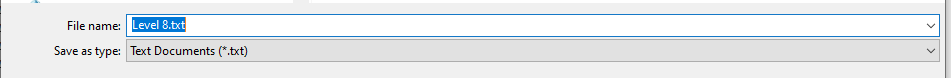

***

### Testing File

It is at this point that you can test the file. By attempting to set the Pandas Data Frame, using the included code for the level 8 data, you will get errors. 

```Python

df2019_8 = pd.read_csv('inputdata/Level 8_02122012.csv')

```

These errors highlighted three issues with the file:

1. We need to clear commas from the files
2. We need to clear addition spaces or tabs from the files
3. We need to clear (`) from the code

As each error appeared in the Jupyter notebook, it gave is a line number where the error was, from this we could see what was causing the issue and clear this.

***

### Find & Replace

The quickest way to clear the errors from the entire page is by using find and replace.

Ctrl F - and then choose the replace option as in this image.

Alternatively choose search on the top bar of notepad ++ - and the find option

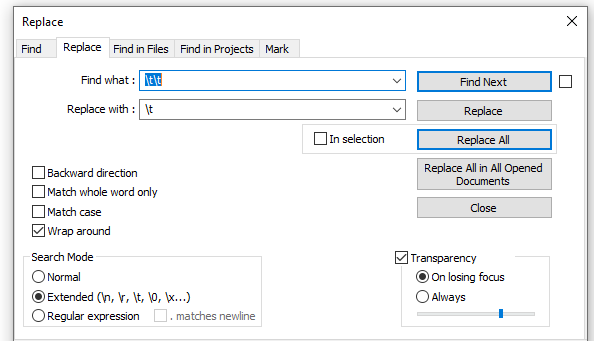

***

### Set Pandas Data Frames

We have now cleared all the issues with this file and Pandas has accepted these files.

We will now set two variables for each of the CSV files.

In [34]:
df2019_8 = pd.read_csv('inputdata/Level 8_17122012.csv')

In [35]:
df2019_8

,Course Code,INSTITUTION and COURSE,EOS,Mid,Unnamed: 4
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0,NaN
1,AL802,Software Design with Cloud Computing,301,306.0,NaN
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0,NaN
3,AL805,Network Management and Cloud Infrastructure,329,442.0,NaN
4,AL810,Quantity Surveying,307,349.0,NaN
...,...,...,...,...,...
925,WD200,Arts (options),221,296.0,NaN
926,WD210,Software Systems Development,271,329.0,NaN
927,WD211,Creative Computing,275,322.0,NaN
928,WD212,Recreation and Sport Management,274,311.0,NaN


In [36]:
df2019_76 = pd.read_csv('inputdata/Level 76_17122021.csv')

In [37]:
df2019_76

,Course Code,INSTITUTION and COURSE,EOS,Mid,Unnamed: 4
0,AL600,Software Design,205,306.0,NaN
1,AL601,Computer Engineering,196,272.0,NaN
2,AL602,Mechanical Engineering,258,424.0,NaN
3,AL604,Civil Engineering,252,360.0,NaN
4,AL630,Pharmacy Technician,306,366.0,NaN
...,...,...,...,...,...
456,WD188,Applied Health Care,206,339.0,NaN
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0,NaN
458,WD206,Electronic Engineering,191,322.0,NaN
459,WD207,Mechanical Engineering,179,330.0,NaN


<br>

***

## Concat and Join - - week7 - Video2

In [38]:
# saved data to dfs for each year - 8, 7, + 6

In [39]:
# Dataframe names

# df2021_8
# df2021_76

# df2020

# df2019_8
# df2019_76

### join 2021 level 8 + level 7 & 6

In [62]:
courses2021_8 = df2021_8[['code','title','pointsR1', 'pointsR2']]

In [63]:
courses2021_76 = df2021_76[['code','title','pointsR1', 'pointsR2']]

In [64]:
courses2021 = pd.concat([courses2021_8, courses2021_76])

In [65]:
courses2021

,code,title,pointsR1,pointsR2
0,AL801,Software Design for Virtual Reality and Gaming...,300,NaN
1,AL802,Software Design in Artificial Intelligence for...,313,NaN
2,AL803,Software Design for Mobile Apps and Connected ...,350,NaN
3,AL805,Computer Engineering for Network Infrastructur...,321,NaN
4,AL810,Quantity Surveying ...,328,NaN
...,...,...,...,...
411,WD188,Applied Health Care ...,220,NaN
412,WD205,Molecular Biology with Biopharmaceutical Scien...,,262v
413,WD206,Electronic Engineering ...,180,NaN
414,WD207,Mechanical Engineering ...,172,NaN


### join 2019 level 8 + level 7 & 6

In [66]:
courses2019_8 = df2019_8[['Course Code','INSTITUTION and COURSE','EOS', 'Mid']]

In [67]:
courses2019_76 = df2019_76[['Course Code','INSTITUTION and COURSE','EOS', 'Mid']]

In [68]:
courses2019 = pd.concat([courses2019_8, courses2019_76])

In [69]:
courses2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


In [70]:
courses2019.columns = ['code','title','EOS', 'Mid']

In [71]:
courses2019

,code,title,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
456,WD188,Applied Health Care,206,339.0
457,WD205,Molecular Biology with Biopharmaceutical Science,208,441.0
458,WD206,Electronic Engineering,191,322.0
459,WD207,Mechanical Engineering,179,330.0


In [72]:
# get 2020 into a similar format for working with

In [73]:
courses2020 = df2020 [['COURSE CODE2','COURSE TITLE','R1 POINTS', 'R2 POINTS', 'EOS', 'EOS Mid-point']]

In [74]:
courses2020

,COURSE CODE2,COURSE TITLE,R1 POINTS,R2 POINTS,EOS,EOS Mid-point
0,AC120,International Business,209,NaN,209,280
1,AC137,Liberal Arts,252,NaN,252,270
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,NaN,,
3,AD102,Graphic Design and Moving Image Design (portfo...,,NaN,,
4,AD103,Textile & Surface Design and Jewellery & Objec...,,NaN,,
...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,188,NaN,188,339
1460,WD210,Software Systems Development,279,NaN,279,337
1461,WD211,Creative Computing,271,NaN,271,318
1462,WD212,Recreation and Sport Management,270,NaN,270,349


In [75]:
courses2020.columns = ['code','title','pointsR1', 'pointsR2','EOS', 'Mid']

In [76]:
courses2020

,code,title,pointsR1,pointsR2,EOS,Mid
0,AC120,International Business,209,NaN,209,280
1,AC137,Liberal Arts,252,NaN,252,270
2,AD101,"First Year Art & Design (Common Entry,portfolio)",,NaN,,
3,AD102,Graphic Design and Moving Image Design (portfo...,,NaN,,
4,AD103,Textile & Surface Design and Jewellery & Objec...,,NaN,,
...,...,...,...,...,...,...
1459,WD208,Manufacturing Engineering,188,NaN,188,339
1460,WD210,Software Systems Development,279,NaN,279,337
1461,WD211,Creative Computing,271,NaN,271,318
1462,WD212,Recreation and Sport Management,270,NaN,270,349


Now we have break downs of each file. we can begin to evaluate.


# notes to Do  / Fix

For the above - lines starting with B are the orignal website data. This output is because of the print(line) command. This can be #'d so it doesnt show. When we do show it however it give us the chance to compare what we have inputted against what we have outputted.



In the regular expression code we have broken up the parts by using () brackets - if you count this you will see there are 4 sets. These 4 sets correspond to the r'\1,\2,\3,\4 - this allows up to format the csv in the way we want.


For places where there is two sets of points we are pulling in the data in the incorrect line

remove * and # from file


write file using line splitting to make file

In [55]:
no_lines = 0                                              # no of lines - set line counter

with open(path, 'w') as f:                                # open( file - with write permissions)
    for line in resp8.iter_lines():                        # iterate through the lines
        dline = line.decode('cp1252')                     # decode the page

        if re_course8.fullmatch(dline):                    # if a line matches the regular expression above do the following
            no_lines = no_lines + 1                       # count it - add one per line
            
            course_code = dline[:5]                       # Course Code is the first 0-4 data points
            #print(course_code)                           # print this
            course_title = dline[7:57]                    # Course title is datapoint 7-56
            #print(f"'{course_title}'")                   # print this
            course_points = re.split(' +', dline[60:])    # Course points = rest of data split with 2 spaces
            if len(course_points) !=2:
                course_points = course_points[:2]
            linesplit = [course_code, course_title, course_points[0], course_points[1]]
            f.write(','.join(linesplit) + '\n')  
            
   
       
        
print(f"Total number of lines is {no_lines}.")            # Print the total number of lines is - line count

Total number of lines is 949.


****
<br>

## End

****